In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = "../logs"
exps = os.listdir(data_path)
value_loss = {}
policy_loss = {}
entropy_loss = {}

for exp in exps:
    try:
        nested_ = os.listdir(os.path.join(data_path, exp))
        file = os.path.join(data_path, exp, nested_[0], "losses.log")
        data = pd.read_csv(file)

        # take all but last _s1, or _s2, or _s3 which are the seeds
        exp_name = "_".join(exp.split("_")[:-1])
        if exp_name not in value_loss:
            value_loss[exp_name] = []
            policy_loss[exp_name] = []
            entropy_loss[exp_name] = []
        
        value_loss[exp_name].append(data["value_loss"])
        policy_loss[exp_name].append(data["policy_loss"])
        entropy_loss[exp_name].append(data["entropy_loss"])
    except:
        print(f"Error with {exp}")
        continue

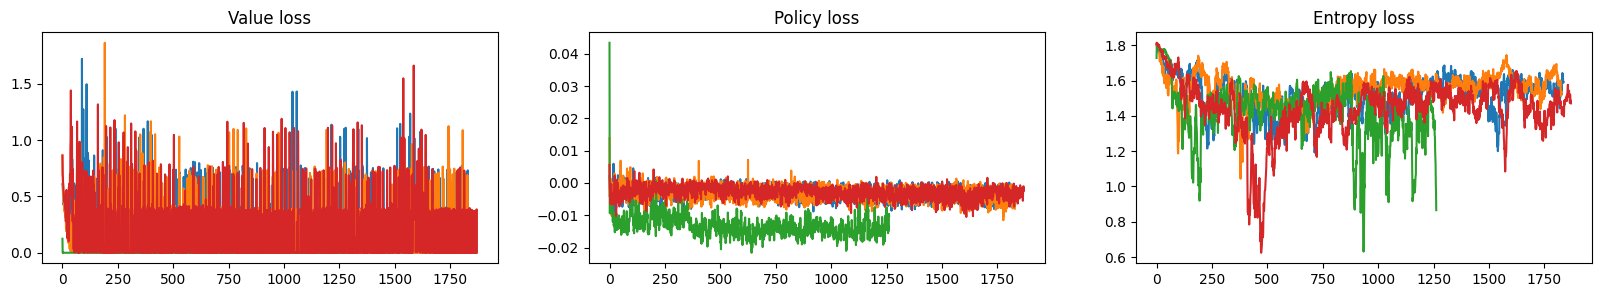

In [3]:
# plot curves
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
for exp in value_loss:
    value_loss[exp] = np.array(value_loss[exp]).mean(axis=0)
    policy_loss[exp] = np.array(policy_loss[exp]).mean(axis=0)
    entropy_loss[exp] = np.array(entropy_loss[exp]).mean(axis=0)

    ax[0].plot(value_loss[exp], label=exp)
    ax[1].plot(policy_loss[exp], label=exp)
    ax[2].plot(entropy_loss[exp], label=exp)
    ax[0].set_title("Value loss")
    ax[1].set_title("Policy loss")
    ax[2].set_title("Entropy loss")
plt.show()
